##Twitter 단어 분석 APP입니다. 

**by Sun-il Kim**
*2019-01-10*

[github MachineLearningSamples](https://github.com/apostkor/MachineLearningSamples)

> 주석은 상단에 표시

**필요 모듈**
- tweepy -> pip install tweepy
- TextBlob -> pip install textblob 
 - 추가로 python -m textblob.download_corpora로 분석 데이터도 받아와야 합니다. 
 

In [96]:
# 트위터 API의 커스터머키와 엑세스토큰을 인터넷상에 공개하는 것을 막기 위해 
# config.py를 만들어 키를 저장하고 .gitignore를 통해 업로드되지 않게 하였습니다. 
import config
import tweepy 
from textblob import TextBlob
# 입력받은 단어를 조금이라도 더 정확하게 번역받기 위해 구글 번역 API를 이용합니다.
from googletrans import Translator
#from translate import Translator

############################   인증     ############################
# 커스터머키
consumer_key = config.api_key
consumer_secret = config.api_secret
# 엑세스토큰
access_token = config.access_token
access_token_secret = config.token_secret
# 트위터 개발자 계정 인증
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)
###################################################################


분석할 검색어를 입력하세요 > 트럼프


**필요한 모듈 import 후 트위터 인증절차**

In [134]:
# 무료 구글 번역 모듈을 가져옵니다. 
# re는 현재 무료 구글 번역 모듈이 이모티콘 번역시 오류가 나기 때문에 유니코드를 재컴파일 하는 용도로 사용됩니다. 
import re
from googletrans import Translator

# 분석할 검색어 입력
ko_keyword = input("분석할 검색어를 입력하세요(한글) > ")

# 구글 번역 모듈 초기화
translator = Translator()
en_keyword = translator.translate(ko_keyword, dest='en', src='auto')
en_keyword = en_keyword.text

print ("ㄴ 상기 검색어 \"{}\" 즉 \"{}\"에 대해서 분석을 실시합니다!\n".format(ko_keyword, en_keyword))


# tweepy API의 .seach() 파라미터를 검색, lang(언어) 과 count(받아오는 트윗 수) 지정
public_tweets_ko = api.search(ko_keyword,lang='ko',count='100')
public_tweets_en = api.search(en_keyword,lang='en',count='100')


# 한글 검색자료를 TextBlob에 적용시키기 위해 다시 영어로 번역해옵니다. 
for tweet in public_tweets_ko:
    # 이모티콘을 제거하여 오류를 제거합니다.
    temp = tweet.text
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    temp = RE_EMOJI.sub(r'', temp)
    # 구글 번역 모듈로 번역을 진행합니다. 
    temp = translator.translate(temp, dest='en', src='auto')
    tweet.text = temp.text
    # API 구조를 이해해야 합니다. 

분석할 검색어를 입력하세요(한글) > 트럼프
ㄴ 상기 검색어 "트럼프" 즉 "Trump"에 대해서 분석을 실시합니다!



**데이터를 받아 번역을 하고 정제하는 과정입니다**

In [135]:
# 번역된 한글 검색자료를 분석하여 저장합니다. 
# 카운터를 만들어 얼마나 긍정적이었고 부정적이었는지를 숫자로 확인해봅니다.
ko_positive_count = 0
ko_neutral_count = 0
ko_negative_count = 0
for tweet in public_tweets_ko:
    
    #print(tweet.text)
    ko_analysis = TextBlob(tweet.text)
    #print(ko_analysis.sentiment.polarity)
    if ko_analysis.sentiment.polarity > 0.0: #긍정적
        ko_positive_count = ko_positive_count + 1
        ko_sample_pos = ko_analysis
    elif ko_analysis.sentiment.polarity == 0.0: #중립적
        ko_neutral_count = ko_neutral_count+1
    else:
        ko_negative_count = ko_negative_count + 1 #부정적
        ko_sample_neg = ko_analysis
    
# 영어 검색자료를 분석하여 저장합니다. 
en_positive_count = 0
en_neutral_count = 0
en_negative_count = 0


for tweet in public_tweets_en:
    
    #print(tweet.text)
    en_analysis = TextBlob(tweet.text)
    #print(analysis.sentiment.polarity)
   
    if en_analysis.sentiment.polarity > 0.0: #긍정적
        en_positive_count = en_positive_count + 1
        en_sample_pos = en_analysis
    elif en_analysis.sentiment.polarity == 0.0: #중립적
        en_neutral_count = en_neutral_count+1
    else:
        en_negative_count = en_negative_count + 1 #부정적
        en_sample_neg = en_analysis
   

print ("--------------------- 국내 여론 분석----------------------")
print ("약 {}% 의 트윗이 긍정적입니다!".format(ko_positive_count))
print ("약 {}% 의 트윗이 중립적입니다!".format(ko_neutral_count))
print ("약 {}% 의 트윗이 부정적입니다!\n".format(ko_negative_count))

print ("--------------------- 국내 트윗 예시----------------------")
print ("긍정적 트윗 예시:\n", ko_sample_pos)
print ("부정적 트윗 예시:\n", ko_sample_neg)    
print ()

print ("--------------------- 해외 여론 분석----------------------")
print ("약 {}% 의 트윗이 긍정적입니다!".format(en_positive_count))
print ("약 {}% 의 트윗이 중립적입니다!".format(en_neutral_count))
print ("약 {}% 의 트윗이 부정적입니다!\n".format(en_negative_count))

print ("--------------------- 해외 트윗 예시----------------------")
print ("긍정적 트윗 예시:\n", en_sample_pos)
print ("부정적 트윗 예시:\n", en_sample_neg)    

--------------------- 국내 여론 분석----------------------
약 17% 의 트윗이 긍정적입니다!
약 26% 의 트윗이 중립적입니다!
약 23% 의 트윗이 부정적입니다!

--------------------- 국내 트윗 예시----------------------
긍정적 트윗 예시:
 RT @ scy200: Trump is in trouble with Kim Jung-eun, and now it seems to know the fact that the Korean economy, which has been tortured and retaliated by the retaliation of Turkey, seems to free fall. We struggle to help North Korea ...
부정적 트윗 예시:
 Trump tells me that the White House secret media has taken off!
I swear the Gregorians.
One that looks like us!

--------------------- 해외 여론 분석----------------------
약 32% 의 트윗이 긍정적입니다!
약 46% 의 트윗이 중립적입니다!
약 20% 의 트윗이 부정적입니다!

--------------------- 해외 트윗 예시----------------------
긍정적 트윗 예시:
 RT @ggreenwald: Will this rather obviously significant correction change any of the claims made about this story yesterday? To pose the que…
부정적 트윗 예시:
 RT @BillKristol: Why the sudden decision in December by Trump to shut down the government over the wall? Trump had no idea of ho

**기본적인 감정도 분석과 그 비율을 국내/국외별로 확인 해보았습니다.**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1143402cc0>,
      dtype=object)

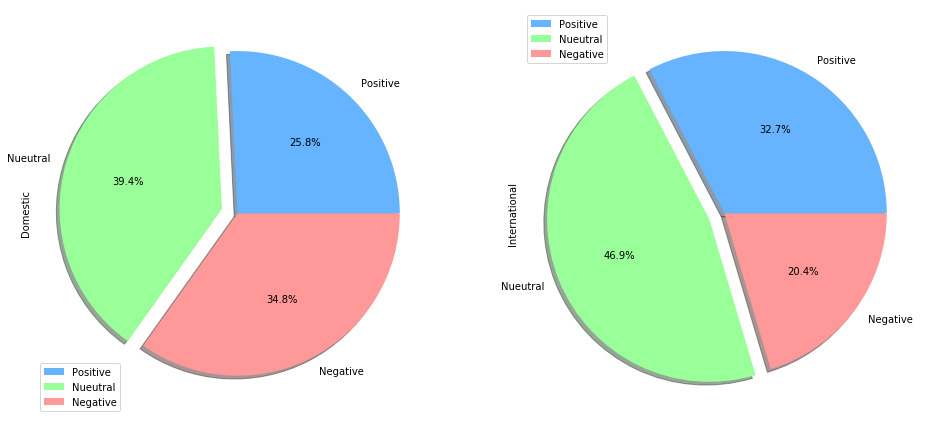

In [158]:
# DataFrame 구조를 위해 Pandas를 가져옵니다. 
import pandas as pd

# df라는 이름의 DataFrame을 만듭니다. 
df = pd.DataFrame({'Domestic':[ko_positive_count, ko_neutral_count, ko_negative_count], 
                   'International':[en_positive_count, en_neutral_count, en_negative_count]}, 

# 파이차트를 만듭니다. 이쁘라고 RGB파스텔톤 넣었으나 무시하세요.
df.plot(kind='pie', subplots=True, figsize=(16,8), explode=(0, 0.1, 0), 
        autopct='%1.1f%%',shadow=True, colors=['#66b3ff','#99ff99','#ff9999'])